In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tldextract
from urllib.parse import urlparse

In [3]:
df = pd.read_csv("Phishing_dataset.csv")

In [4]:
df.head(10)

,URL,Domain,DomainLength,label
0,https://www.southbankmosaics.com,www.southbankmosaics.com,24,1
1,https://www.uni-mainz.de,www.uni-mainz.de,16,1
2,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,22,1
3,https://www.sfnmjournal.com,www.sfnmjournal.com,19,1
4,https://www.rewildingargentina.org,www.rewildingargentina.org,26,1
5,https://www.globalreporting.org,www.globalreporting.org,23,1
6,https://www.saffronart.com,www.saffronart.com,18,1
7,https://www.nerdscandy.com,www.nerdscandy.com,18,1
8,https://www.hyderabadonline.in,www.hyderabadonline.in,22,1
9,https://www.aap.org,www.aap.org,11,1


Label represent 2 categories :- 1 (benign url) and 0 (phishing url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   URL           235795 non-null  object
 1   Domain        235795 non-null  object
 2   DomainLength  235795 non-null  int64 
 3   label         235795 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.2+ MB


In [6]:
df.isna().sum()

URL             0
Domain          0
DomainLength    0
label           0
dtype: int64

<h1>Feature Extraction</h1>

In [7]:
##length of URL

def length(url):
    return len(url)

df["URL_length"] = df["URL"].apply(length)

In [8]:
#### Domain name  ( Top Level Domain)
def extract_tld(url):
    domain = urlparse(url).netloc
    tld = re.search(r'[^.]+$', domain)
    return tld.group(0) if tld else None 

df["tld"] = df["URL"].apply(extract_tld)

In [9]:
## TLD length

def cal_tld_length(tld):
    return len(tld)


df["tld_length"] = df["tld"].apply(cal_tld_length)

In [10]:
##IS HTTPS
def ishttps(url):
    if re.match(r"^https:?//",url):
        return 1
    else:
        return 0


df["is_HTTPS"] = df["URL"].apply(ishttps)

In [11]:
##Is IP
def isIP(url):
    if re.match(r"^(\d{1,3}\.){3}\d{1,3}$",url):
        return 1
    else:
        return 0
    
df["is_IP"] = df["URL"].apply(isIP)

In [12]:
### No of subdomain in the URl
def count_of_subdomains(url):
    parsed_url = urlparse(url)
    domain_parts = parsed_url.hostname.split('.')

    return len(domain_parts) - 2 if len(domain_parts) > 2 else 0

df["no_of_Subdomains"] = df["URL"].apply(count_of_subdomains)


In [13]:
## Checking the position of Double Slash
def check_double_slash_position(url):
    corr_pos = 6 if url.startswith("http://") else 7 if url.startswith("https://") else -1
    first_occur = url.find("//") + 1 

    next_occur = url.find("/" , first_occur + 2)

    if corr_pos == -1:
        return -1
    elif next_occur != -1:
        return 1
    else:
        return 0
    

df["extra_slash"] = df["URL"].apply(check_double_slash_position)

In [14]:
## Checking the presence of @ in url

def check_for_attherate(url):
    contain_at = 1 if "@" in url else 0
    return contain_at

df["contain_@"] = df["URL"].apply(check_for_attherate)

In [15]:
## Checking the presence of hyphen in url
def check_for_hyphen(url):
    contain_at = 1 if "-" in url else 0
    return contain_at

df["contain_hyphen"] = df["URL"].apply(check_for_hyphen)

In [16]:
df.sample(10)

,URL,Domain,DomainLength,label,URL_length,tld,tld_length,is_HTTPS,is_IP,no_of_Subdomains,extra_slash,contain_@,contain_hyphen
163187,https://www.atsc.org,www.atsc.org,12,1,20,org,3,1,0,1,0,0,0
214075,https://confirmarcionfianet--loginhomeveri.rep...,confirmarcionfianet--loginhomeveri.repl.co,42,0,51,co,2,1,0,1,1,0,1
43433,http://www.estateplanningcentral.com,www.estateplanningcentral.com,29,0,36,com,3,0,0,1,0,0,0
193047,https://www.ilcik.cz,www.ilcik.cz,12,1,20,cz,2,1,0,1,0,0,0
163340,http://www.amldevelopment.com,www.amldevelopment.com,22,0,29,com,3,0,0,1,0,0,0
197990,http://www.meerna.me,www.meerna.me,13,0,20,me,2,0,0,1,0,0,0
83190,https://www.kunsthaus.ch,www.kunsthaus.ch,16,1,24,ch,2,1,0,1,0,0,0
114846,http://www.gastreatmentinfo.site,www.gastreatmentinfo.site,25,0,32,site,4,0,0,1,0,0,0
91009,https://dev-homebanpersonas.pantheonsite.io/in...,dev-homebanpersonas.pantheonsite.io,35,0,55,io,2,1,0,1,1,0,1
149316,https://www.mitchwagner.com,www.mitchwagner.com,19,1,27,com,3,1,0,1,0,0,0


<h1>EDA</h1>

In [17]:
df.describe()

,DomainLength,label,URL_length,tld_length,is_HTTPS,is_IP,no_of_Subdomains,extra_slash,contain_@,contain_hyphen
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.0,235795.000000,235795.000000,235795.000000,235795.000000
mean,21.470396,0.571895,35.366954,2.764456,0.780534,0.0,1.164694,0.256273,0.006391,0.197812
std,9.150793,0.494805,41.214346,0.599739,0.413886,0.0,0.600920,0.436576,0.079689,0.398350
min,4.000000,0.000000,14.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,24.000000,2.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000
50%,20.000000,1.000000,28.000000,3.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000
75%,24.000000,1.000000,35.000000,3.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000
max,110.000000,1.000000,6097.000000,13.000000,1.000000,0.0,10.000000,1.000000,1.000000,1.000000


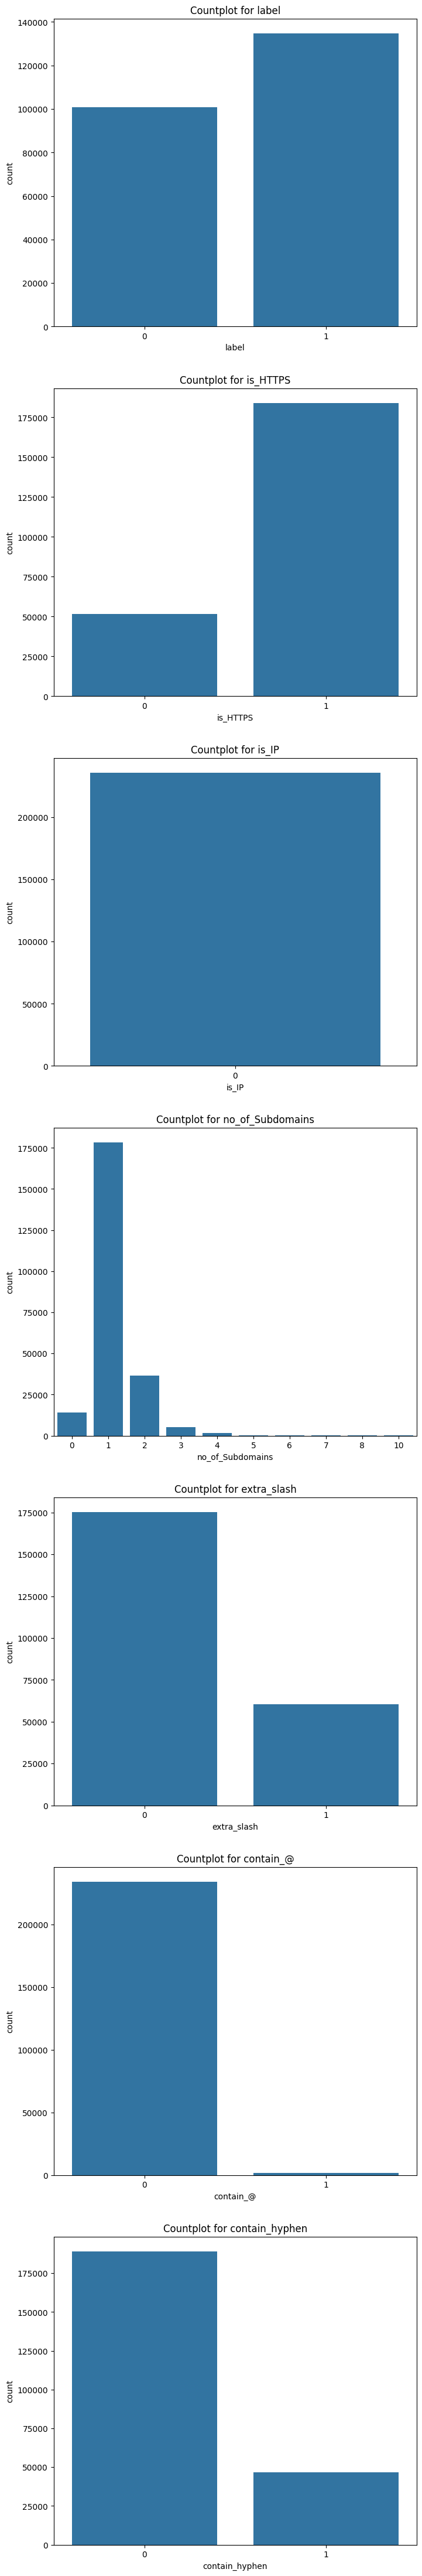

In [22]:
features = ["label","is_HTTPS","is_IP","no_of_Subdomains","extra_slash","contain_@","contain_hyphen"]
count = len(features)

fig , axs = plt.subplots(count, 1,  figsize=(8 , 8*count))
for i , feature in enumerate(features):
    sns.countplot(x = df[feature] , ax = axs[i])
    axs[i].set_title(f"Countplot for {feature}")

plt.show()



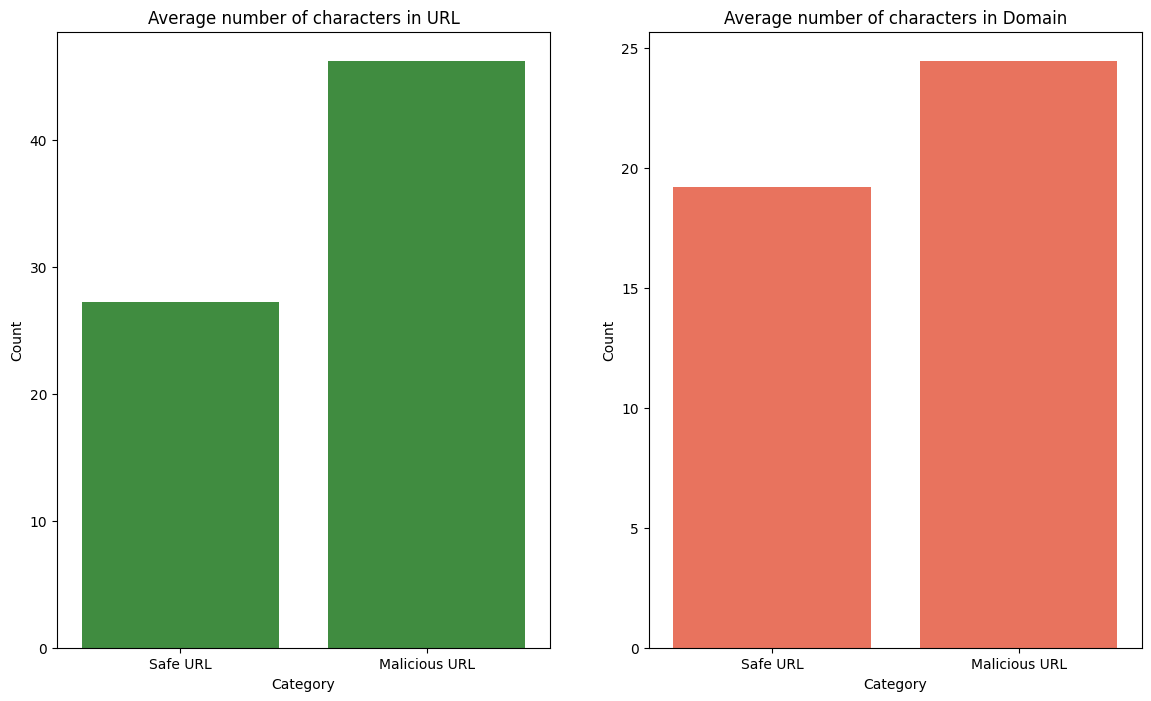

In [138]:
url_length_mean = df[df["label"] == 1]["URL_length"].mean() , df[df["label"] == 0]["URL_length"].mean()
domain_length_mean = df[df["label"] == 1]["DomainLength"].mean() , df[df["label"] == 0]["DomainLength"].mean()

label = ["Safe URL" , "Malicious URL"]

plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
sns.barplot(x = label , y = url_length_mean , color = "green", legend = False ,alpha = 0.8)
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Average number of characters in URL")

plt.subplot(1,2,2)
sns.barplot(x = label , y = domain_length_mean , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Average number of characters in Domain")
plt.show()

Malicious URL/Phishing URL and its domain has more number of average characters as compared to Safe URL/Benign URL

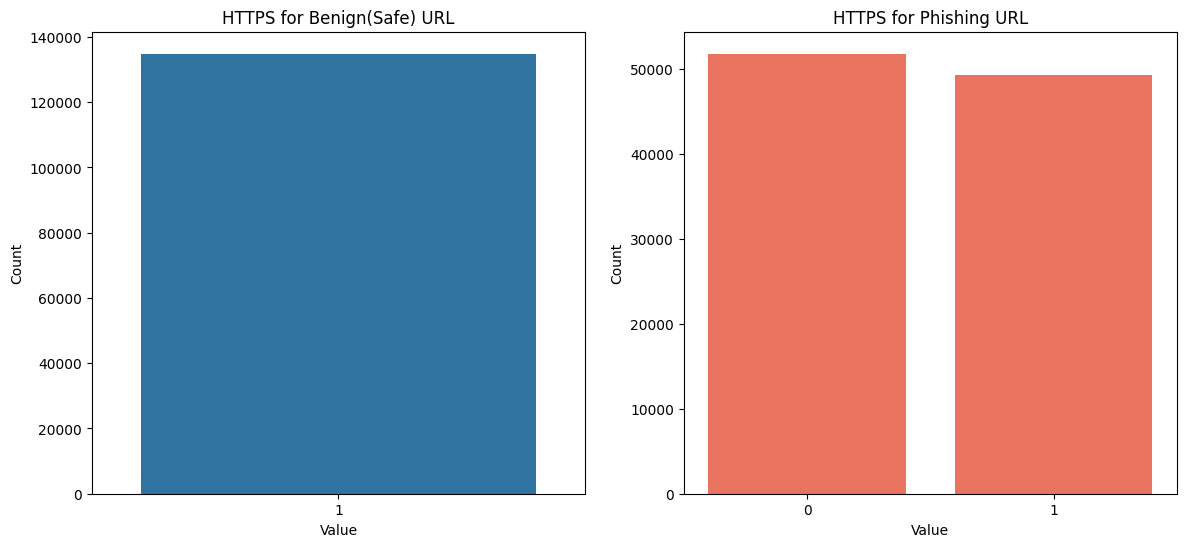

In [124]:
https_safe = df[df["label"] == 1]["is_HTTPS"]
https_phish = df[df["label"] == 0]["is_HTTPS"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = https_safe)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("HTTPS for Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = https_phish , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("HTTPS for Phishing URL")
plt.show()

Benign(Safe) URL always contain "http" while Malicious URL contains both "http" and "https"

That means if URL starts with "http" we can say that it is malicious but if URL starts with "https" then we have to take look at more features

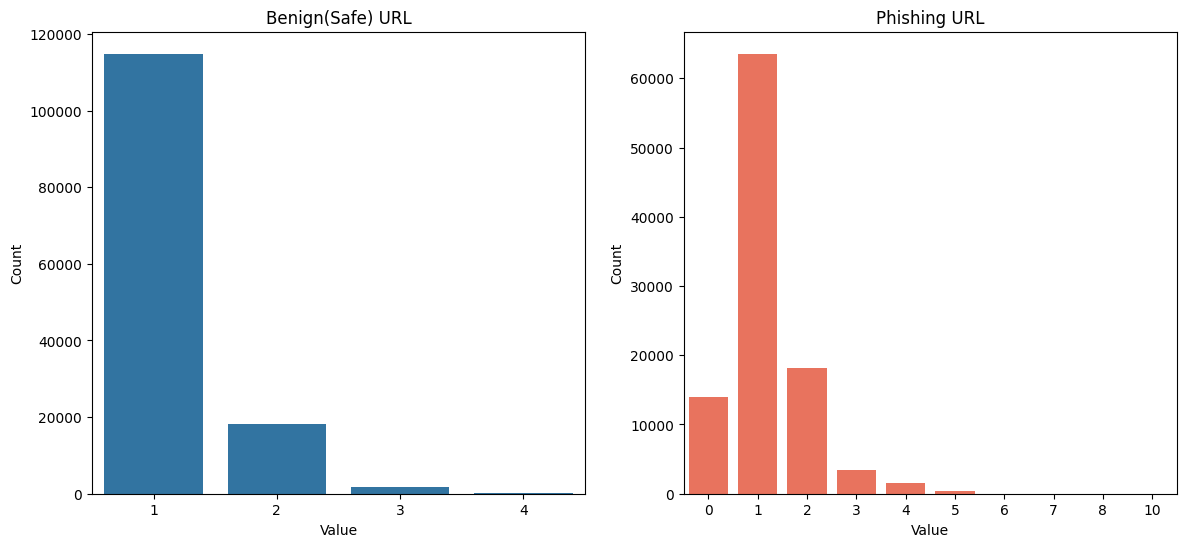

In [140]:
safe_subdom = df[df["label"] == 1]["no_of_Subdomains"]
phish_subdom = df[df["label"] == 0]["no_of_Subdomains"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Phishing URL")
plt.show()

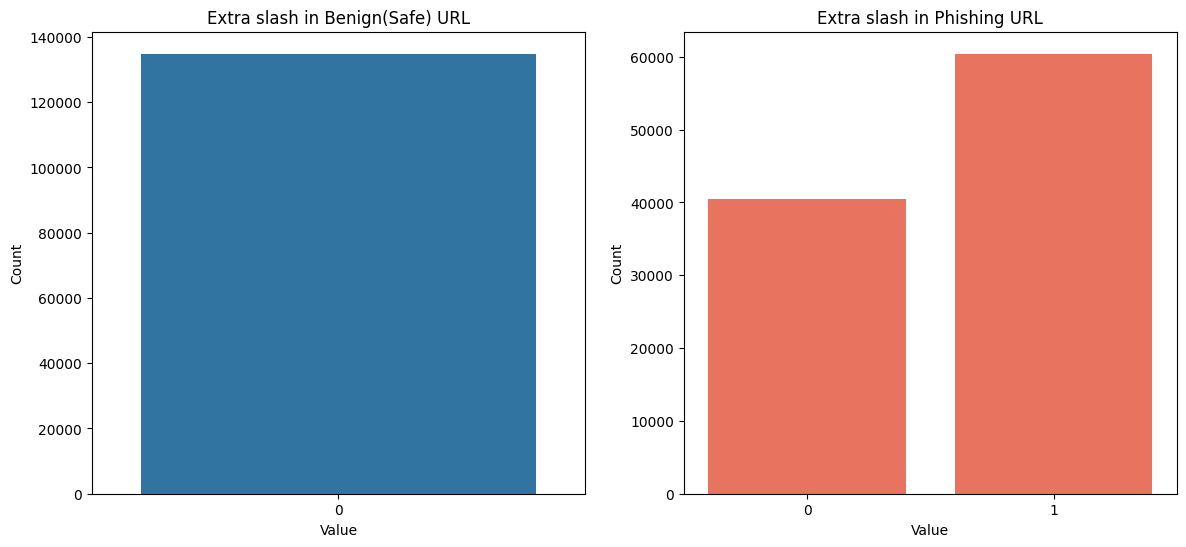

In [122]:
safe_subdom = df[df["label"] == 1]["extra_slash"]
phish_subdom = df[df["label"] == 0]["extra_slash"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Extra slash in Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Extra slash in Phishing URL")
plt.show()

Safe URL does not contain any extra / while in case of Malicious URL it may or may not contain /

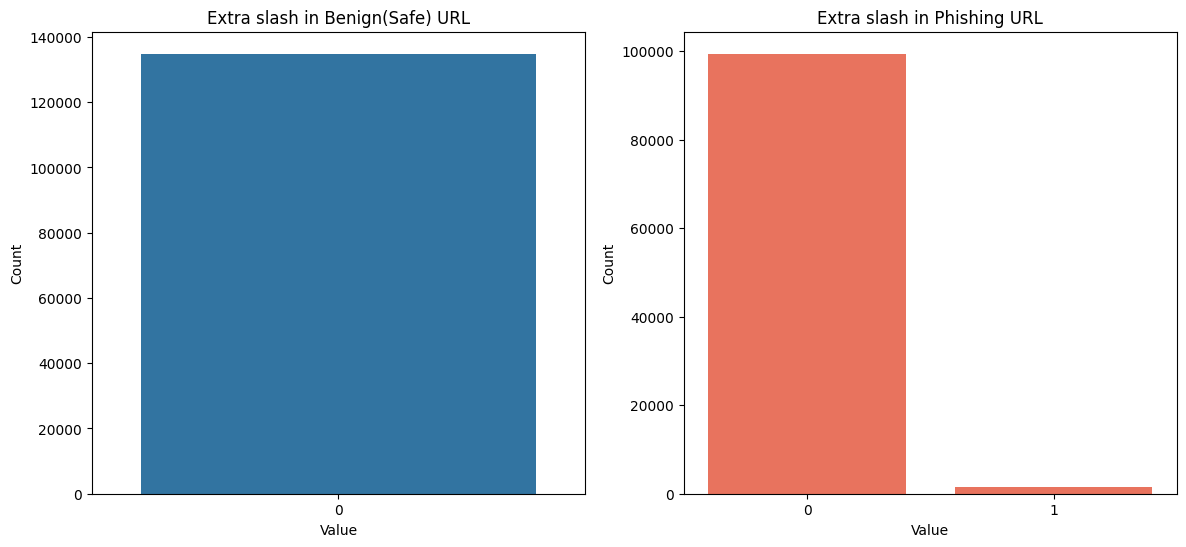

In [126]:
safe_subdom = df[df["label"] == 1]["contain_@"]
phish_subdom = df[df["label"] == 0]["contain_@"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Extra slash in Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Extra slash in Phishing URL")
plt.show()

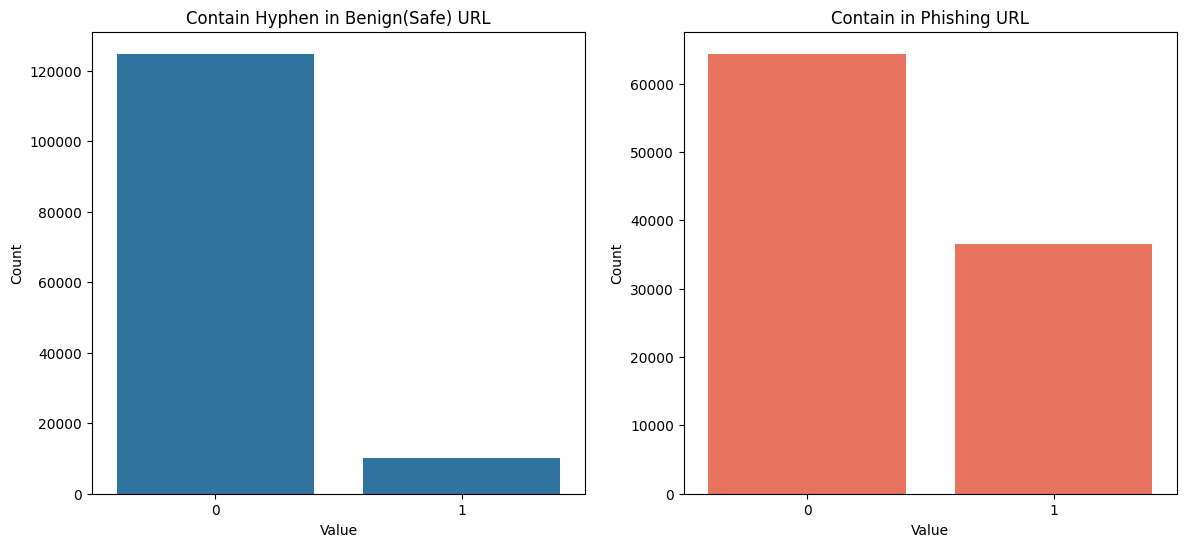

In [131]:
safe_subdom = df[df["label"] == 1]["contain_hyphen"]
phish_subdom = df[df["label"] == 0]["contain_hyphen"]

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x = safe_subdom)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Contain Hyphen in Benign(Safe) URL")

plt.subplot(1,2,2)
sns.countplot(x = phish_subdom , color = "tomato", legend = False)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Contain in Phishing URL")
plt.show()